In [199]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [200]:
class model(nn.Module):

  def __init__(self,input_size=4,hidden1_size=5,hidden2_size=6,num_classes=3):
    super().__init__()
    self.fc1=nn.Linear(input_size,hidden1_size)
    self.fc2=nn.Linear(hidden1_size,hidden2_size)
    self.out=nn.Linear(hidden2_size,num_classes)

  def forward(self,x):
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.out(x)
    return x

In [201]:
model=model()

In [202]:
iris = load_iris()
X = iris.data
y = iris.target

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [204]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [205]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

In [206]:
# critarion and optimizer

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [207]:
epochs=200
losses=[]
accuracy_l=[]
for i in range (epochs):

  y_pred=model.forward(X_train)
  loss=criterion(y_pred,y_train)
  losses.append(loss.detach().numpy())
  _,predicted=torch.max(y_pred,1)
  accuracy=accuracy_score(y_train,predicted)
  accuracy_l.append(accuracy)
  #print the loss
  if i%10==0:
    print(f"loss at epoch {i} is {loss} | Accuracy {accuracy}" )
  # backward
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

loss at epoch 0 is 1.1604641675949097 | Accuracy 0.3333333333333333
loss at epoch 10 is 1.0568324327468872 | Accuracy 0.5
loss at epoch 20 is 0.9787319302558899 | Accuracy 0.6833333333333333
loss at epoch 30 is 0.7883245944976807 | Accuracy 0.8083333333333333
loss at epoch 40 is 0.5245923399925232 | Accuracy 0.8583333333333333
loss at epoch 50 is 0.3503774404525757 | Accuracy 0.8833333333333333
loss at epoch 60 is 0.22822192311286926 | Accuracy 0.9333333333333333
loss at epoch 70 is 0.14456677436828613 | Accuracy 0.95
loss at epoch 80 is 0.09072073549032211 | Accuracy 0.9666666666666667
loss at epoch 90 is 0.06699294596910477 | Accuracy 0.975
loss at epoch 100 is 0.05657396465539932 | Accuracy 0.975
loss at epoch 110 is 0.05097357928752899 | Accuracy 0.975
loss at epoch 120 is 0.04791644960641861 | Accuracy 0.975
loss at epoch 130 is 0.04588158428668976 | Accuracy 0.9833333333333333
loss at epoch 140 is 0.04450106620788574 | Accuracy 0.9833333333333333
loss at epoch 150 is 0.0434783883

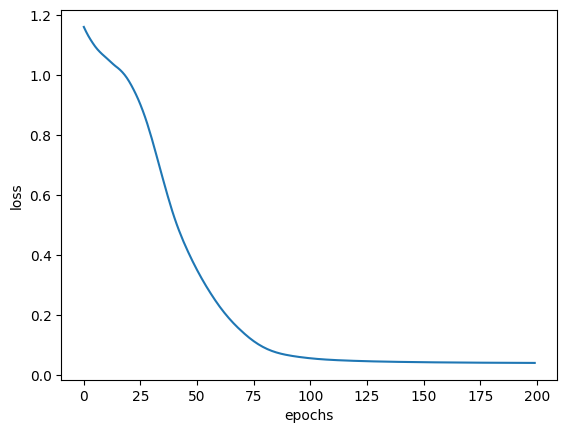

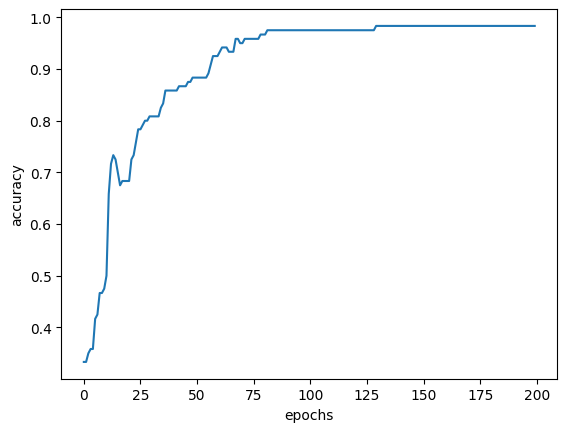

In [208]:
# plotting Loss VS epoch

plt.plot(range(epochs),losses)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()


# plotting accuracy vs epoch
plt.plot(range(epochs),accuracy_l)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

In [210]:
# testing
with torch.no_grad():
  y_eval=model(X_test)
  loss=criterion(y_eval,y_test)
  _,predicted=torch.max(y_eval,1)
  accuracy_f=accuracy_score(predicted,y_test)
  print("Accuracy:",accuracy_f)
  print('Loss:',float(loss))

Accuracy: 1.0
Loss: 0.04716772586107254
